# House Prices California.

In [1]:
library(readxl)
housing <- read_excel("C:/Users/user/Desktop/housing.xlsx")
View(housing)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY
-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY
-122.25,37.84,52,3104,687,1157,647,3.1200,241400,NEAR BAY
-122.26,37.84,42,2555,665,1206,595,2.0804,226700,NEAR BAY


Visualizing the Data

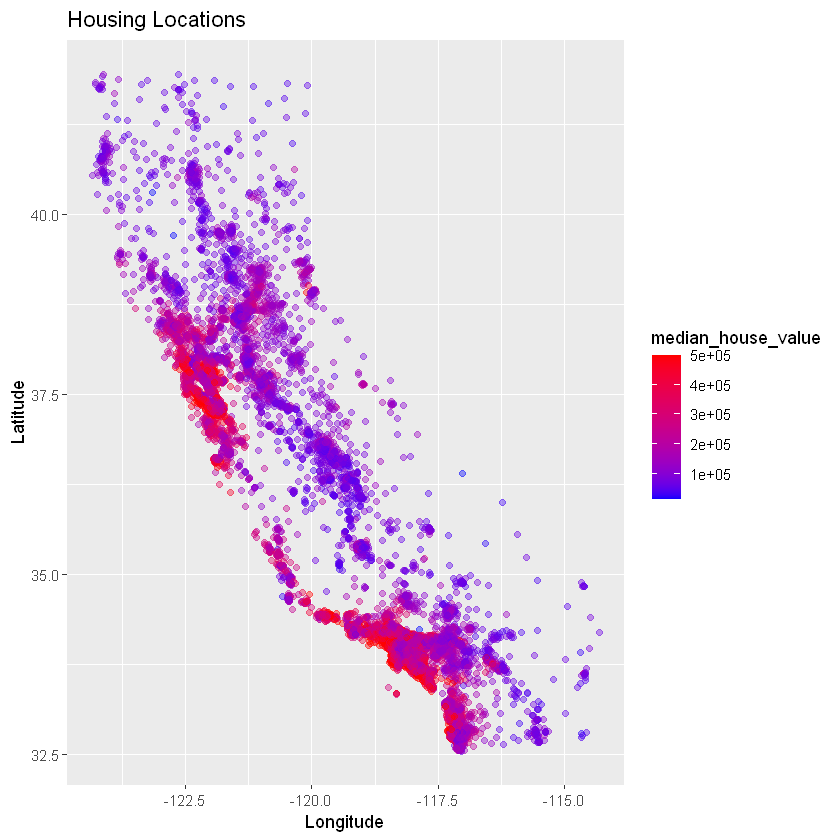

In [2]:
# Assuming 'housing' is your dataset
# Load necessary libraries
library(ggplot2)

# Plotting longitude and latitude to visualize housing locations
ggplot(housing, aes(x = longitude, y = latitude)) +
  geom_point(alpha = 0.4, aes(color = median_house_value)) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Housing Locations", x = "Longitude", y = "Latitude")


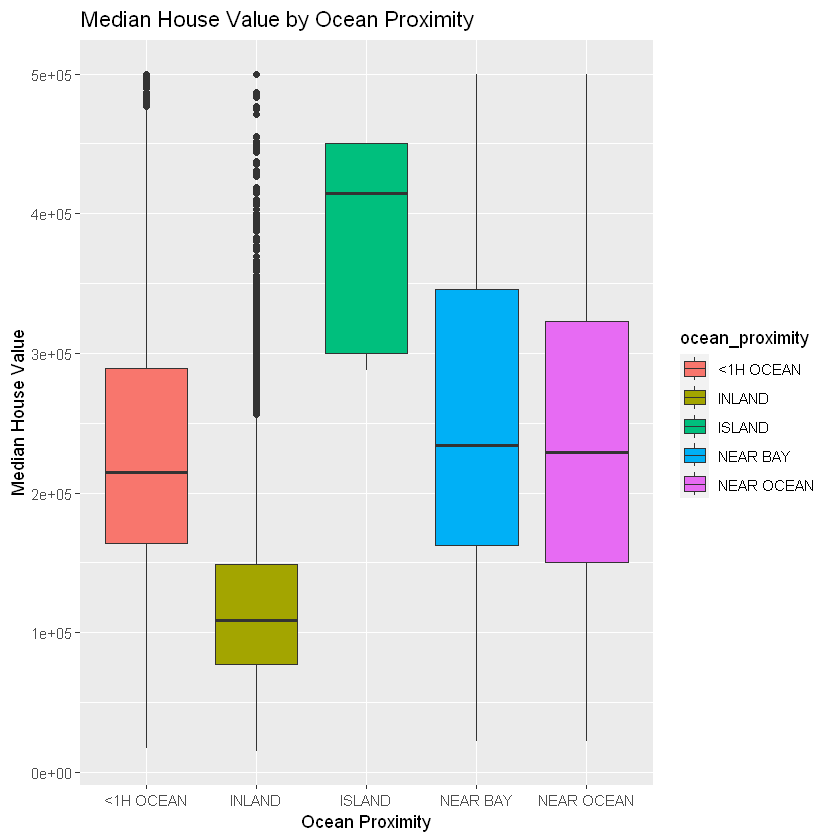

In [7]:
# Boxplots of median house value by ocean proximity
ggplot(housing, aes(x = ocean_proximity, y = median_house_value, fill = ocean_proximity)) +
  geom_boxplot() +
  labs(title = "Median House Value by Ocean Proximity", x = "Ocean Proximity", y = "Median House Value")


Preparing Data for Machine Learning

In [4]:
# Handling missing values
# Assuming 'housing' is your dataset
# Replace missing values in 'total_bedrooms' with the median
median_total_bedrooms <- median(housing$total_bedrooms, na.rm = TRUE)
housing$total_bedrooms[is.na(housing$total_bedrooms)] <- median_total_bedrooms

# Encoding categorical variable 'ocean_proximity'
# If 'ocean_proximity' is categorical, convert it to numerical values using dummy variables or label encoding

# Splitting data into train and test sets
set.seed(123) # For reproducibility
train_indices <- sample(1:nrow(housing), 0.8 * nrow(housing)) # 80% train, 20% test
train_set <- housing[train_indices, ]
test_set <- housing[-train_indices, ]

Selecting and Training the Model

In [5]:
# Building a linear regression model
lm_model <- lm(median_house_value ~ ., data = train_set)

# Print summary of the model
summary(lm_model)


Call:
lm(formula = median_house_value ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-552513  -42721  -10521   28737  766954 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -2.239e+06  9.782e+04 -22.888  < 2e-16 ***
longitude                 -2.637e+04  1.135e+03 -23.235  < 2e-16 ***
latitude                  -2.480e+04  1.121e+03 -22.119  < 2e-16 ***
housing_median_age         1.066e+03  4.885e+01  21.830  < 2e-16 ***
total_rooms               -5.221e+00  8.584e-01  -6.082 1.22e-09 ***
total_bedrooms             6.998e+01  6.563e+00  10.663  < 2e-16 ***
population                -3.807e+01  1.161e+00 -32.800  < 2e-16 ***
households                 7.864e+01  7.327e+00  10.734  < 2e-16 ***
median_income              3.885e+04  3.704e+02 104.894  < 2e-16 ***
ocean_proximityINLAND     -4.089e+04  1.947e+03 -20.998  < 2e-16 ***
ocean_proximityISLAND      1.862e+05  3.442e+04   5.410 6.40e-08 ***
o

Evaluating the Model

In [9]:
# Making predictions on the test set
predictions <- predict(lm_model, newdata = test_set)

# Calculating evaluation metrics (e.g., RMSE, MAE, R-squared)
# For instance, you can calculate RMSE
rmse <- sqrt(mean((test_set$median_house_value - predictions)^2))
rmse


[1] 68646.48

[1] "RMSE: 68646.48"
[1] "MAE: 50128.71"
[1] "R-squared: 0.6448"


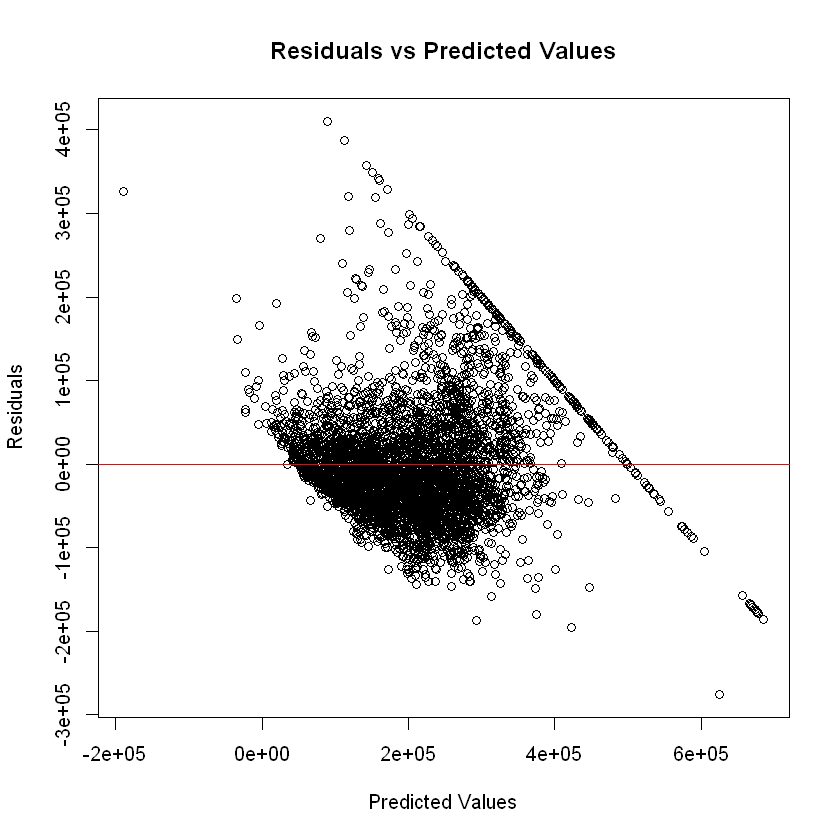

In [10]:
# Predictions on the test set
predictions <- predict(lm_model, newdata = test_set)

# Calculating residuals
residuals <- test_set$median_house_value - predictions

# Plotting residuals
plot(predictions, residuals,
     xlab = "Predicted Values",
     ylab = "Residuals",
     main = "Residuals vs Predicted Values")
abline(h = 0, col = "red")  # Adding a reference line at y = 0

# Calculating other evaluation metrics
rmse <- sqrt(mean((test_set$median_house_value - predictions)^2))
mae <- mean(abs(test_set$median_house_value - predictions))
rsquared <- summary(lm_model)$r.squared

# Print the calculated metrics
print(paste("RMSE:", round(rmse, 2)))
print(paste("MAE:", round(mae, 2)))
print(paste("R-squared:", round(rsquared, 4)))
